# Chapter１


## 1.1 Numpy


In [ ]:
import numpy as np


def inspect_tensor(name, x):
    """
    テンソル（配列）の情報を構造的に表示するデバッグ用関数
    """
    print(f"\n--- [ Inspect: {name} ] ---")
    print(f"Shape: {x.shape}")
    print(f"Type: {x.__class__}")
    print(f"Rank: {x.ndim}")
    print(f"Dtype: {x.dtype}")
    print(f"Data: \n{x}")
    print("-" * 30)


# ==========================================
# 1. データの定義 (Data Definition)
# ==========================================
# Deep Learningでは、これを「テンソル」と呼ぶ。
# 今回は 2x2 の行列 (Matrix) である。


A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

inspect_tensor("A", A)
inspect_tensor("B", B)


# ==========================================
# 2. 要素ごとの演算 (Element-wise Operations)
# ==========================================
# 注意: Deep Learningの数式で単に "+" や "⊙" (Hadamard product) と書かれるもの。
# ルール: AとBの shape が完全に一致している必要がある。
# (または後述のブロードキャストが可能であること)

print("\n=== 1. Element-wise Operations (要素ごと) ===")

# 足し算: 同じ位置の要素同士を足す
# [[1+5, 2+6],
#  [3+7, 4+8]]
add_result = A + B
print(f"A + B (Addition):\n{add_result}")

# ★重要★ 掛け算 ( ' * ' 演算子)
# 数学的な「行列の掛け算」ではない！
# 単なる「同じ場所にある数字同士の掛け算」である。
# [[1*5, 2*6],
#  [3*7, 4*8]]
element_wise_mult = A * B
print(f"A * B (Element-wise Multiplication):\n{element_wise_mult}")


# ==========================================
# 3. 行列積 (Dot Product / Matrix Multiplication)
# ==========================================
# ★最重要★ Deep Learningの「層（レイヤ）」の計算はこれだ。
# 数式: Y = X・W
# ルール: 左側の行列の「列数」と、右側の行列の「行数」が一致しなければならない。
# (N, M) dot (M, K) -> (N, K)

print("\n=== 2. Dot Product (行列積) ===")

# Python 3.5以上では '@' 演算子が推奨される (np.dot(A, B)と同じ)
# 計算手順の可視化:
# [[1*5 + 2*7,  1*6 + 2*8],
#  [3*5 + 4*7,  3*6 + 4*8]]
#
# [[5+14,  6+16],
#  [15+28, 18+32]]

dot_result = A @ B  # または A.dot(B)
print(f"A @ B (Dot Product):\n{dot_result}")


# ==========================================
# 4. ブロードキャスト (Broadcasting)
# ==========================================
# NumPyの真骨頂。形状が合わない場合、自動で拡張して計算する。
# バイアス項の加算などで多用する。

print("\n=== 3. Broadcasting (ブロードキャスト) ===")

C = np.array([10, 20])  # Shape: (2,)
inspect_tensor("C (Scalar-like vector)", C)

# Aは (2, 2)、Cは (2,)
# NumPyはCを勝手に [[10, 20], [10, 20]] に拡張(コピー)して計算してくれる。
broadcast_result = A * C
print(f"A * C (Broadcasting):\n{broadcast_result}")
# 解説:
# [1, 2] * [10, 20] -> [10, 40]
# [3, 4] * [10, 20] -> [30, 80]


# ==========================================
# 5. よく使う便利機能 (Common Utils)
# ==========================================
print("\n=== 4. Useful Utils ===")

# 転置 (Transpose): 行と列を入れ替える
# 逆伝播(Backpropagation)の実装で死ぬほど使う。
print(f"A.T (Transpose):\n{A.T}")

# Flatten: 一列に並べる．
# 2次元配列を1次元配列に変換する
print(f"A.flatten (Flatten):\n{A.flatten()}")

## 1.2 Matplotlib


Data Prepared.
Displaying Plot 1...


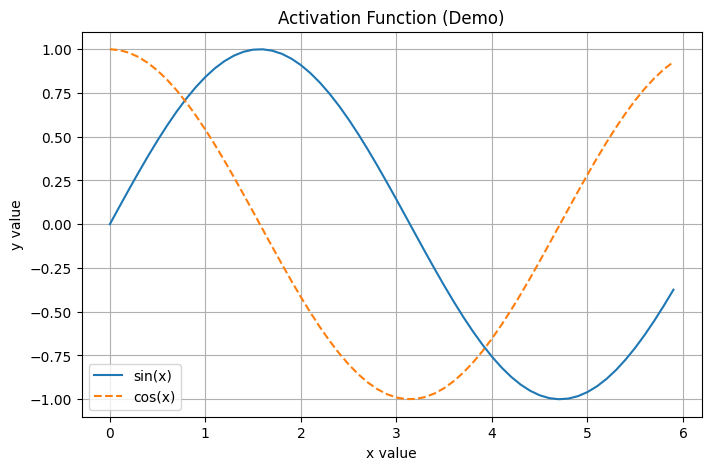

Displaying Plot 2 (Image)...


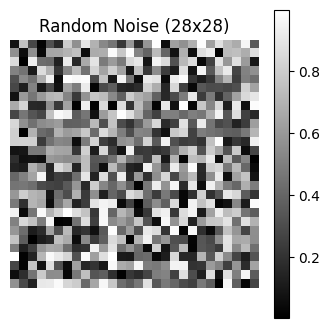

Displaying Plot 3 (Subplots)...


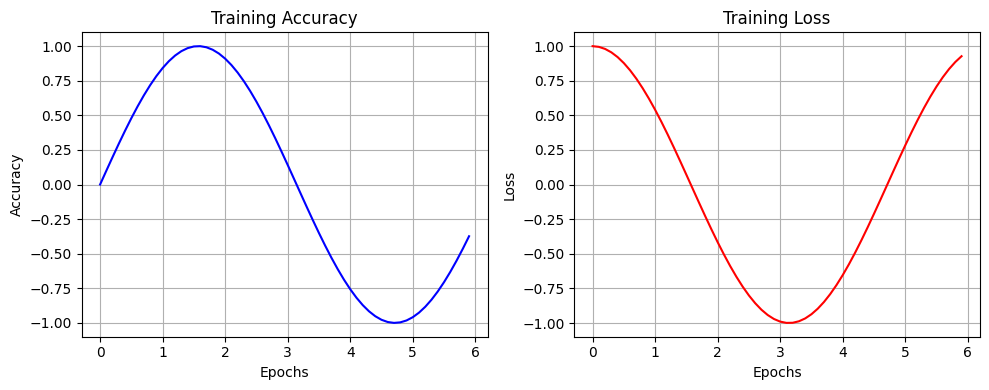

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 0. データ生成 (Data Generation)
# ==========================================
# グラフを描くには、まず「x軸の点」が必要だ。
# np.arange(start, end, step): step刻みで生成
# np.linspace(start, end, num): startからendまでをnum等分 (滑らかな曲線用)

x = np.arange(0, 6, 0.1)  # 0から6まで0.1刻み [0, 0.1, ... 5.9]
y1 = np.sin(x)  # 正弦波
y2 = np.cos(x)  # 余弦波

print("Data Prepared.")

# ==========================================
# 1. 基本的なグラフ描画 (Basic Plotting)
# ==========================================
# Deep Learningでは「活性化関数」や「損失関数の推移」を見るのに使う。

# キャンバス(Figure)の準備。これがないと始まらない。
plt.figure(figsize=(8, 5))  # 横8インチ, 縦5インチ

# プロット実行
# label引数は、後の legend() で凡例を表示するために必須。
plt.plot(x, y1, label="sin(x)")
plt.plot(x, y2, linestyle="--", label="cos(x)")  # 破線にする

# 装飾 (これがないグラフはエンジニア失格である)
plt.xlabel("x value")  # x軸のラベル
plt.ylabel("y value")  # y軸のラベル
plt.title("Activation Function (Demo)")  # タイトル
plt.legend()  # 凡例を表示 (左下の線とか)
plt.grid(True)  # グリッド線 (値を見やすくする)

# 表示
print("Displaying Plot 1...")
plt.show()


# ==========================================
# 2. 画像の表示 (Image Visualization)
# ==========================================
# Deep Learning (CNN等) では、画像を「行列」として扱う。
# その行列が「人間の目にどう見えるか」を確認する。

# ダミー画像データの生成 (28x28ピクセル)
# np.random.rand -> 0.0~1.0の乱数
img_data = np.random.rand(28, 28)

plt.figure(figsize=(4, 4))

# imshow: 行列を画像として表示
# cmap='gray': グレースケールで表示 (MNISTなどで必須)
# interpolation='nearest': 補間なし (ピクセルをそのまま表示)
plt.imshow(img_data, cmap="gray", interpolation="nearest")

plt.title("Random Noise (28x28)")
plt.colorbar()  # 横にカラーバーを表示 (値の大小がわかる)
plt.axis("off")  # 軸目盛りを消す (画像には不要)

print("Displaying Plot 2 (Image)...")
plt.show()


# ==========================================
# 3. 複数のグラフを並べる (Subplots)
# ==========================================
# 「学習データの正解率」と「損失」を同時に見たい時などに使う。
# The Code Smith Recommended: plt.subplots() が現代的な書き方だ。

# 1行2列のキャンバスを作成
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# 1つ目のグラフ (左側: axes[0])
axes[0].plot(x, y1, color="blue")
axes[0].set_title("Training Accuracy")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Accuracy")
axes[0].grid(True)

# 2つ目のグラフ (右側: axes[1])
axes[1].plot(x, y2, color="red")
axes[1].set_title("Training Loss")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].grid(True)

plt.tight_layout()  # レイアウトの崩れを自動調整
print("Displaying Plot 3 (Subplots)...")
plt.show()

# Chapter２


## 2.1 Perceptron


## 2.2 Multi-Layer Perceptron


# Chapter３


## 3.1 Activation Functions


## 3.2 Forward Propagation


## 3.3 MNIST Inference & Batch


# Chapter４


## Loss & Gradients


# Chapter５


# Chapter６


# Chapter７


# Chapter８
